In [1]:
PATH = unicode('C:/Users/zero/Google 云端硬盘/useful tools/BGO', 'utf-8')
FILENAME = 'UTC %Y %m %d %H %M %S.csv'
UP = .65

In [2]:
PATH = unicode('C:/Users/zero/Google 云端硬盘/useful tools/tmp', 'utf-8')
FILENAME = 'UTC %Y %m %d %H %M.csv'
UP = .65

In [3]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import operator as op
import datetime as dt
import numpy as np
import os

%config InlineBackend.figure_format='svg'
%matplotlib inline

In [4]:
fs = map(lambda fn: os.path.join(PATH, fn), os.listdir(PATH))
df = pd.concat(map(pd.read_csv, fs)).drop_duplicates().reset_index(drop=True)

In [5]:
for c in ['sname', 'star']:
    print 'Group by', c
    for k, d in df.groupby(c):
        print '\t{:0=5.2f}%\t{:5}\t{}'.format(d.shape[0] / df.shape[0] * 100, d.shape[0], k)

Group by sname
	30.71%	 8862	ios服
	67.16%	19383	安卓bili服
	02.13%	  616	安卓联运服
Group by star
	75.76%	21864	SR
	24.24%	 6997	SSR


In [6]:
for c in ['star']:#['sname', 'star']:
    for k, d in df.groupby(c):
        print 'Group by', c, '=', k
        d_ = dict(map(lambda (k, d): [k, d.shape[0]], d.groupby('info')))
        for k_ in sorted(d_, key=d_.get, reverse=True):
            print '\t{:0=5.2f}%\t{:5}\t{}'.format(d_[k_] / d.shape[0] * 100, d_[k_], k_)

Group by star = SR
	33.47%	 7317	托马斯·爱迪生
	04.57%	  999	赫拉克勒斯
	04.56%	  998	玛尔达
	04.54%	  993	斯忒诺
	04.52%	  989	卫宫
	04.48%	  979	伊丽莎白·巴托里
	04.47%	  977	玛丽·安托瓦内特
	04.40%	  961	卡米拉
	04.35%	  952	齐格飞
	04.33%	  947	骑士迪昂
	04.24%	  927	玉藻猫
	02.04%	  445	阿塔兰忒
	02.02%	  441	芬恩·麦克库尔
	01.97%	  430	卫宫〔Assassin〕
	01.96%	  428	阿斯托尔福
	01.94%	  424	海伦娜·布拉瓦茨基
	01.93%	  421	罗摩
	01.85%	  404	童谣
	01.84%	  402	兰斯洛特
	01.84%	  402	贝奥武夫
	01.82%	  398	弗兰肯斯坦
	01.74%	  381	安妮·伯妮＆玛莉·瑞德
	00.42%	   92	阿尔托莉雅·潘德拉贡〔Alter〕
	00.26%	   56	尼禄·克劳狄乌斯
	00.25%	   55	美狄亚〔Lily〕
	00.21%	   46	李书文
Group by star = SSR
	62.53%	 4375	库·丘林[Alter]
	03.12%	  218	贞德
	03.07%	  215	阿周那
	03.02%	  211	阿尔托莉雅·潘德拉贡
	02.99%	  209	莫德雷德
	02.94%	  206	诸葛孔明〔埃尔梅罗Ⅱ世〕
	02.89%	  202	开膛手杰克
	02.84%	  199	弗朗西斯·德雷克
	02.77%	  194	南丁格尔
	02.67%	  187	弗拉德三世
	02.67%	  187	迦尔纳
	02.62%	  183	阿蒂拉
	02.62%	  183	俄里翁
	02.42%	  169	玉藻前
	00.46%	   32	尼古拉·特斯拉
	00.39%	   27	女王梅芙


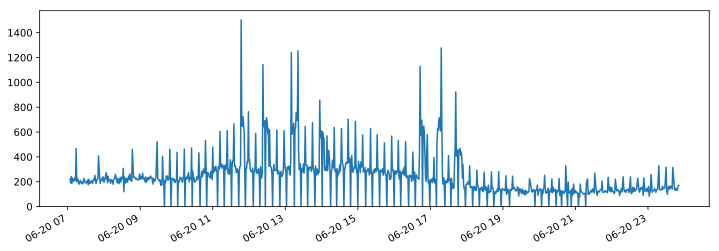

In [7]:
x, y = zip(*map(lambda utc: [dt.datetime.utcnow().strptime(utc, FILENAME),
                             min(pd.read_csv(os.path.join(PATH, utc))['id'])], os.listdir(PATH)))
plt.figure(figsize=(12,4))
plt.plot_date(mpl.dates.date2num(x[:-1]), np.subtract(y[1:], y[:-1]), ls='-', marker=None)
plt.gcf().autofmt_xdate()
plt.ylim(ymin=0)
plt.show()

In [8]:
SERVANT = dict(map(lambda s: [s, df[df['star'] == s]['info'].unique().tolist()], ['SR', 'SSR']))
i2s = list(reduce(op.or_, map(set, SERVANT.itervalues())))
s2i = dict(zip(i2s, range(len(i2s))))

In [9]:
LIMIT = {
    '4章': ['尼古拉·特斯拉'],
    '5章': ['库·丘林[Alter]', '女王梅芙'],
    'UP': ['库·丘林[Alter]']
}

In [69]:
UP = .8

In [70]:
LATENT_CLASS = {
#     '初始十连',
    '~3章剧情池': set(SERVANT['SSR']) - set(LIMIT['4章']) - set(LIMIT['5章']),
    '4章剧情池': set(SERVANT['SSR']) - set(LIMIT['5章']),
    '5~章剧情池': set(SERVANT['SSR']),
    'UP池': set(SERVANT['SSR']) - set(LIMIT['4章']) - set(LIMIT['5章']) | set(LIMIT['UP'])
}
alpha = np.zeros((len(LATENT_CLASS), len(s2i)))
for k in LATENT_CLASS:
    for k_ in LATENT_CLASS[k]:
        alpha[LATENT_CLASS.keys().index(k), s2i[k_]] = 1
alpha[LATENT_CLASS.keys().index('UP池'), s2i[LIMIT['UP'][0]]] = (sum(alpha[LATENT_CLASS.keys().index('UP池')]) - 1) / (1 - UP) * UP

In [71]:
import collections as co
y = np.zeros(len(s2i))
for k, v in co.Counter(df[df['star'] == 'SSR']['info']).iteritems():
    y[s2i[k]] = v
y /= sum(y)
x = np.array(map(lambda a: a / sum(a), alpha))
print np.linalg.lstsq(x.T, y)[0]

[ 0.1514935   0.01000429  0.06174075  0.77676147]


In [67]:
LC, D, V = len(LATENT_CLASS), sum(df['star'] == 'SSR'), len(s2i)

document = np.array(map(s2i.get, df[df['star'] == 'SSR']['info']))

In [68]:
def d2v(d):
    v = [0] * V
    for i in d:
        v[i] += 1
    return v

In [14]:
%%time
def GS(n, alpha, beta):
    np.random.seed(0)
    
    z = - np.ones(D)

    for i in range(n):
#         theta = np.array(map(lambda lc: np.random.dirichlet(alpha[lc]), range(LC)))
        theta = np.array(map(lambda lc: np.random.dirichlet(alpha[lc] + d2v(document[z == lc])), range(LC)))
        pi = np.random.dirichlet(beta + map(lambda lc: sum(z == lc), range(LC)))
        ps = pi * map(lambda d: theta[:, d], document)
        z = np.array(map(lambda p: np.random.choice(LC, p=p / sum(p)), ps))
    
    return theta, pi

theta, pi = GS(1000, alpha, np.array([1, 1, 1, 1]))
print pi

[ 0.04099577  0.17078215  0.04319254  0.74502954]
Wall time: 56min 16s


In [15]:
for i in range(LC):
    print LATENT_CLASS.keys()[i]
    for k in sorted(SERVANT['SSR'], key=lambda k: theta[i][s2i[k]] , reverse=True):
        print '\t{:0=5.2f}%\t{}'.format(theta[i][s2i[k]] * 100, k)

~3章剧情池
	25.06%	诸葛孔明〔埃尔梅罗Ⅱ世〕
	16.08%	俄里翁
	12.42%	开膛手杰克
	08.68%	阿周那
	08.03%	弗拉德三世
	06.58%	迦尔纳
	06.16%	南丁格尔
	05.37%	弗朗西斯·德雷克
	04.91%	贞德
	03.81%	莫德雷德
	01.71%	玉藻前
	00.90%	阿尔托莉雅·潘德拉贡
	00.28%	阿蒂拉
	00.00%	库·丘林[Alter]
	00.00%	尼古拉·特斯拉
	00.00%	女王梅芙
4章剧情池
	13.32%	开膛手杰克
	13.09%	南丁格尔
	10.94%	贞德
	10.60%	俄里翁
	10.07%	弗拉德三世
	08.74%	阿尔托莉雅·潘德拉贡
	07.90%	弗朗西斯·德雷克
	07.07%	阿周那
	06.14%	迦尔纳
	03.87%	诸葛孔明〔埃尔梅罗Ⅱ世〕
	03.79%	阿蒂拉
	02.31%	玉藻前
	01.74%	尼古拉·特斯拉
	00.42%	莫德雷德
	00.00%	库·丘林[Alter]
	00.00%	女王梅芙
5~章剧情池
	20.47%	莫德雷德
	14.53%	库·丘林[Alter]
	11.60%	玉藻前
	10.60%	贞德
	08.42%	女王梅芙
	08.12%	阿周那
	04.89%	阿蒂拉
	03.77%	弗朗西斯·德雷克
	03.53%	南丁格尔
	03.25%	尼古拉·特斯拉
	03.25%	阿尔托莉雅·潘德拉贡
	02.82%	迦尔纳
	01.75%	俄里翁
	01.51%	弗拉德三世
	01.11%	诸葛孔明〔埃尔梅罗Ⅱ世〕
	00.41%	开膛手杰克
UP池
	81.68%	库·丘林[Alter]
	02.57%	莫德雷德
	02.38%	迦尔纳
	02.31%	阿尔托莉雅·潘德拉贡
	02.27%	阿蒂拉
	02.11%	弗朗西斯·德雷克
	01.98%	玉藻前
	01.51%	阿周那
	01.42%	诸葛孔明〔埃尔梅罗Ⅱ世〕
	00.65%	弗拉德三世
	00.45%	贞德
	00.33%	开膛手杰克
	00.21%	南丁格尔
	00.15%	俄里翁
	00.00%	尼古拉·特斯拉
	00.00%	女王梅芙
